<h2>Project of regression problem</h2>

Problem description:

Goal:

Dataset: This dataset contains medical insurance cost information for 1338 individuals. It includes demographic and health-related variables such as age, sex, BMI, number of children, smoking status, and residential region in the US. The target variable is charges, which represents the medical insurance cost billed to the individual.

In [70]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sb
import warnings, lru, numba
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config


<h2>Data preparation</h2>
In this stage we conduct data preparation to ensure the missing data, wrong data types and basic feature engineering are in place.

In [71]:
regression_dataset = pd.read_csv('./data/medical insurance/insurance.csv')

In [72]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


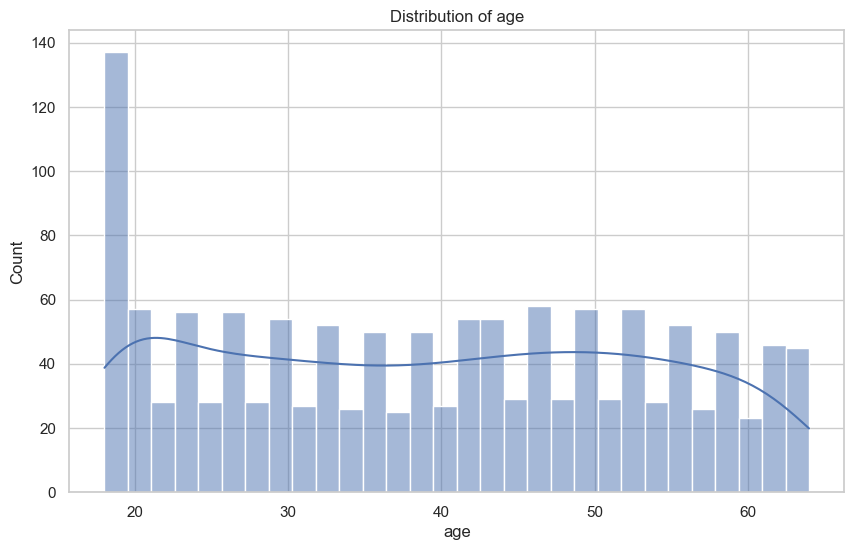

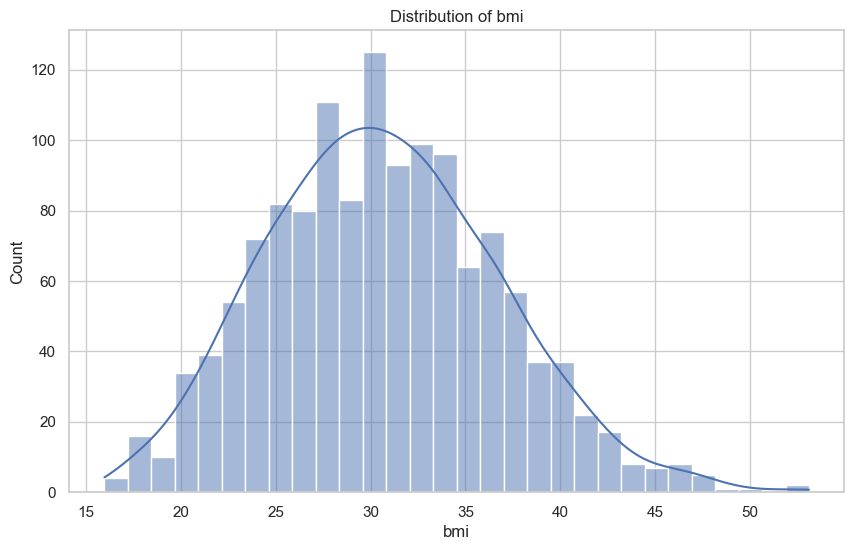

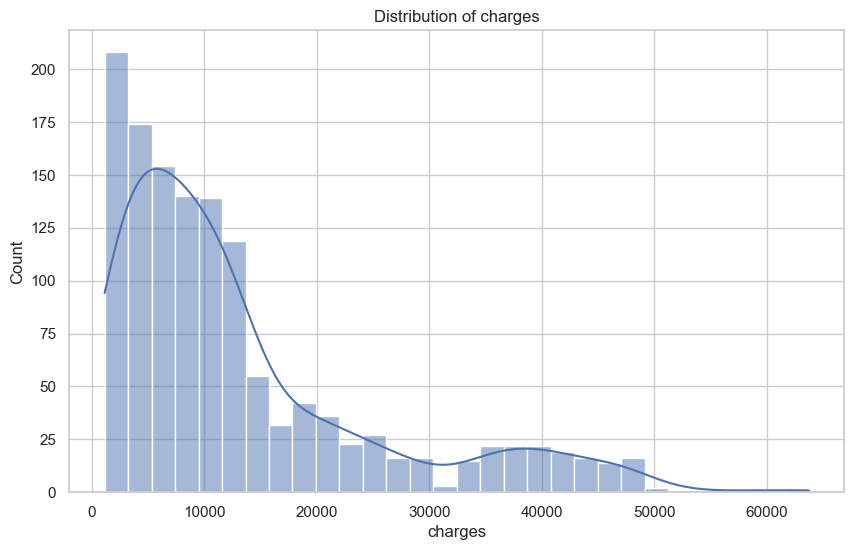

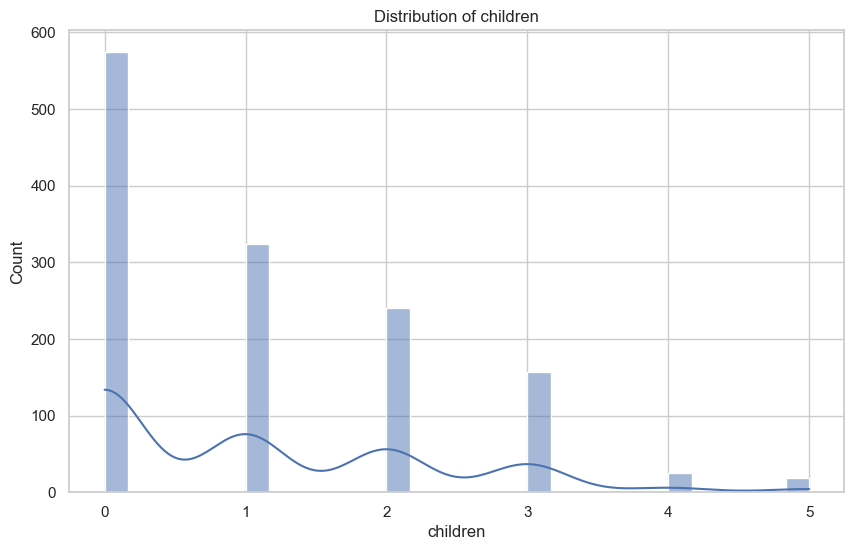

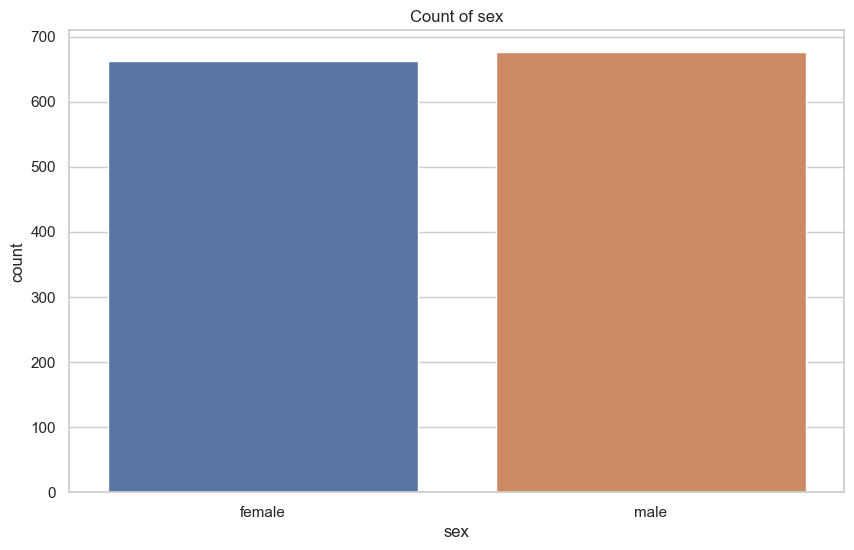

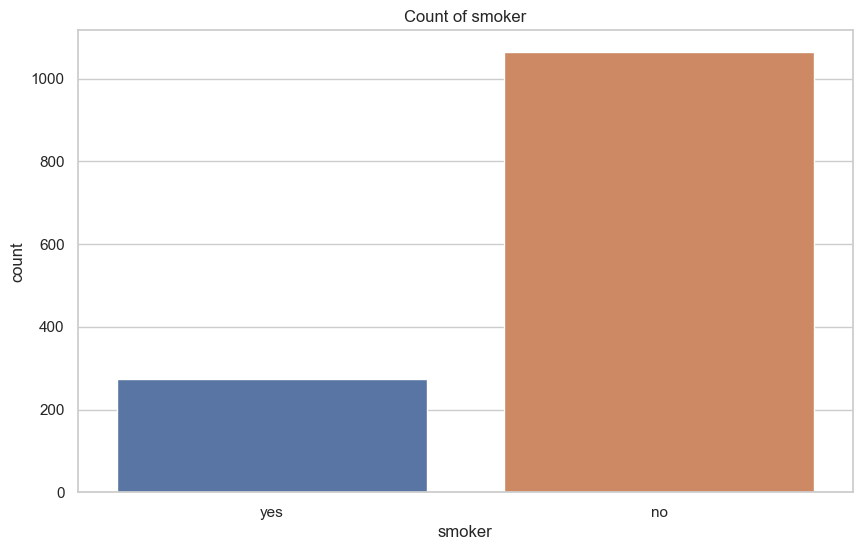

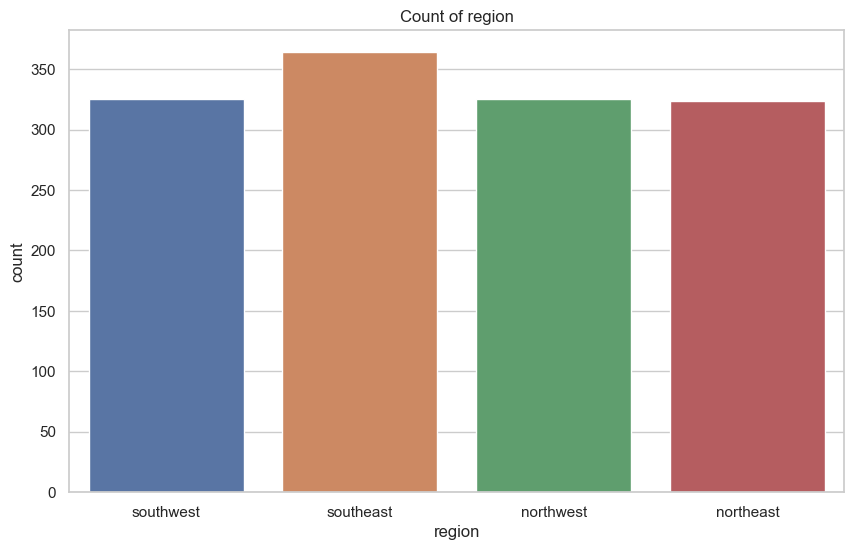

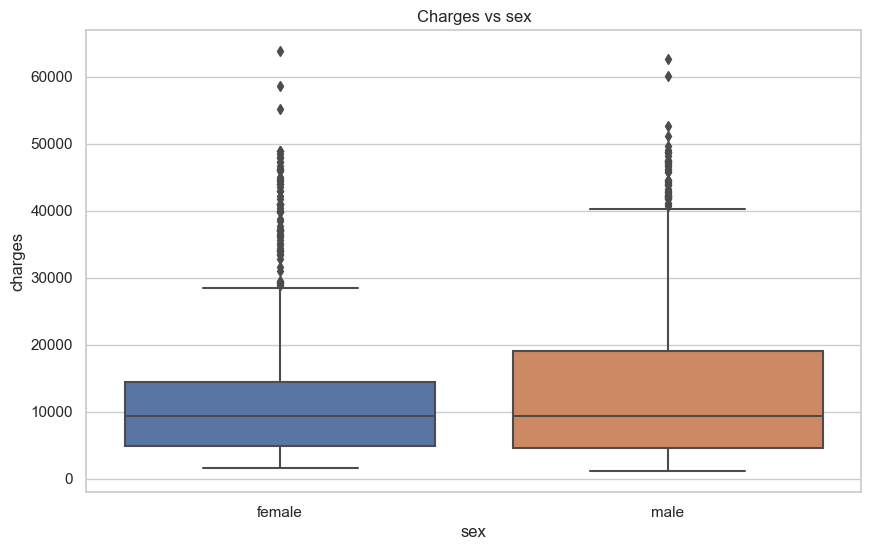

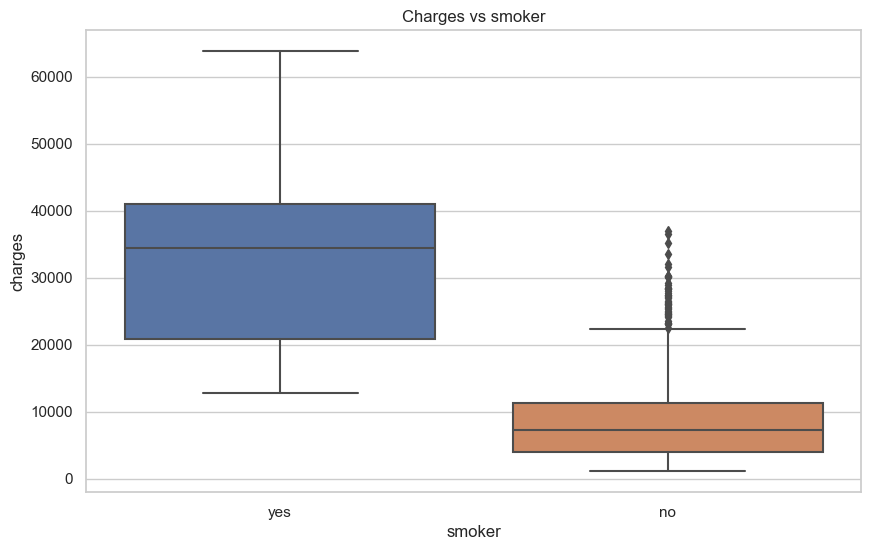

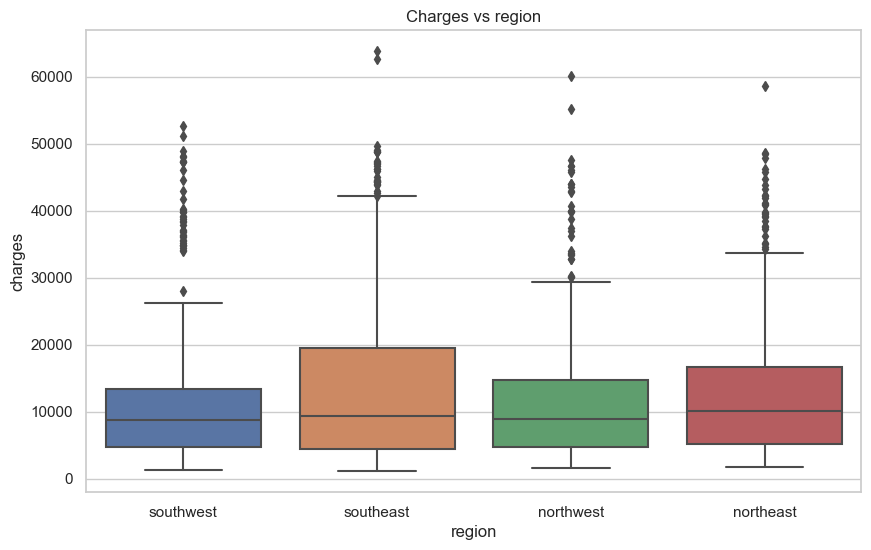

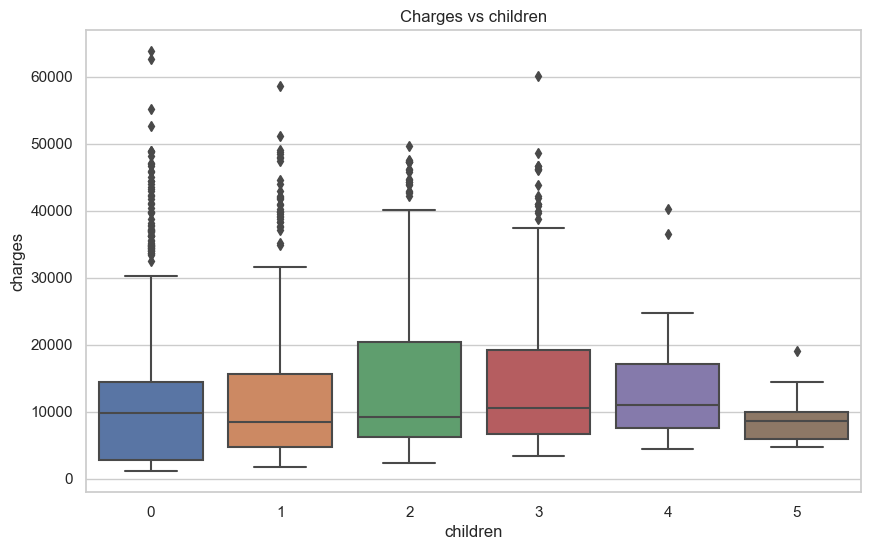

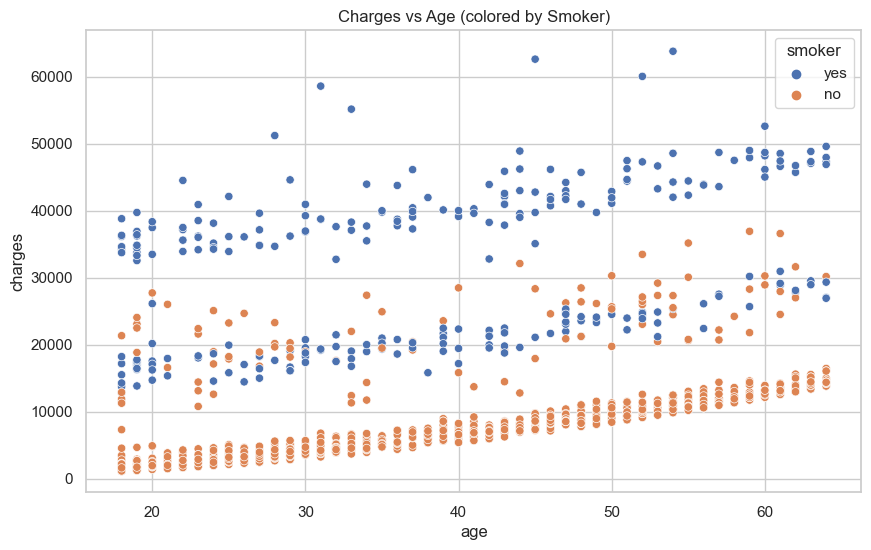

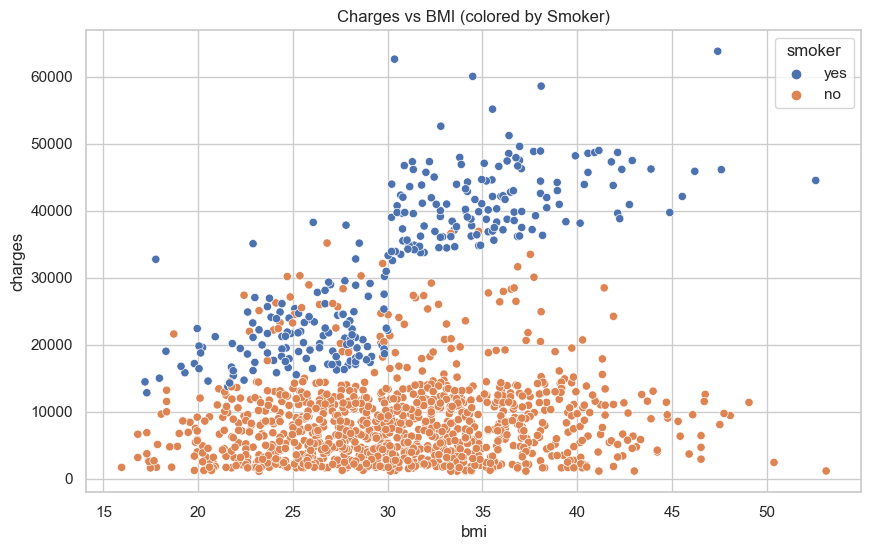

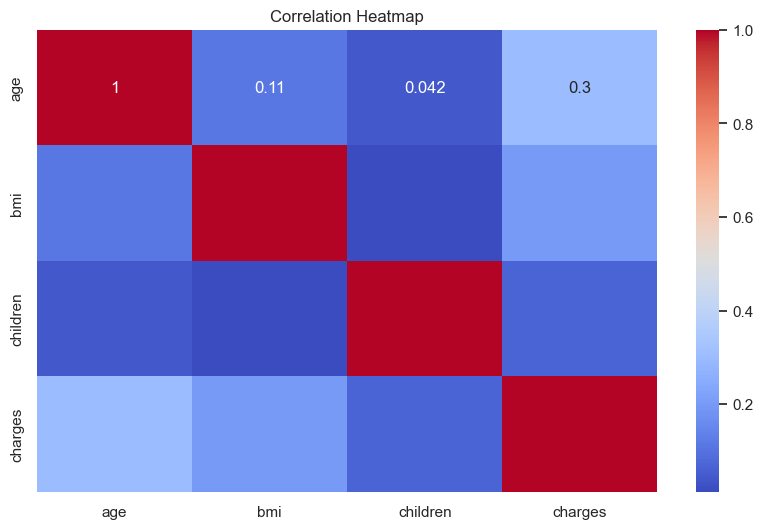

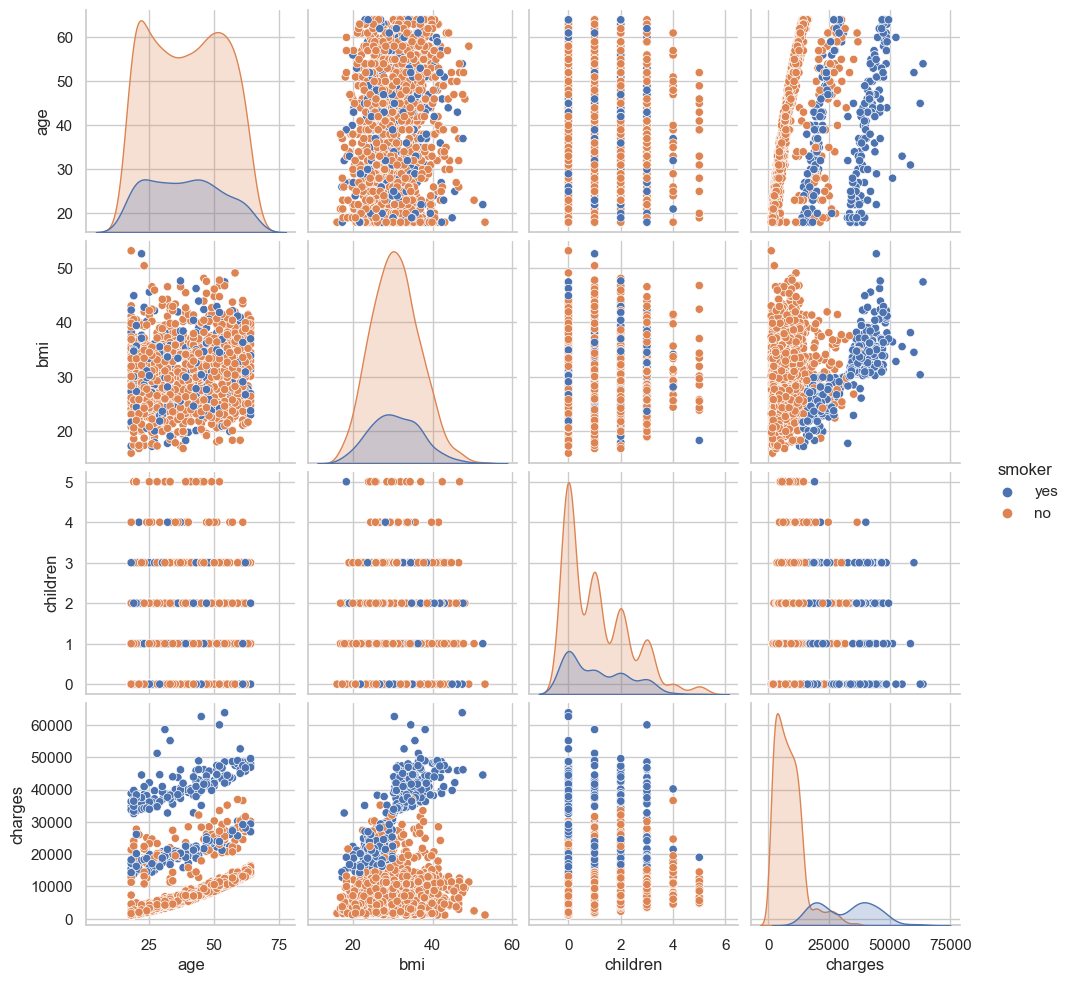

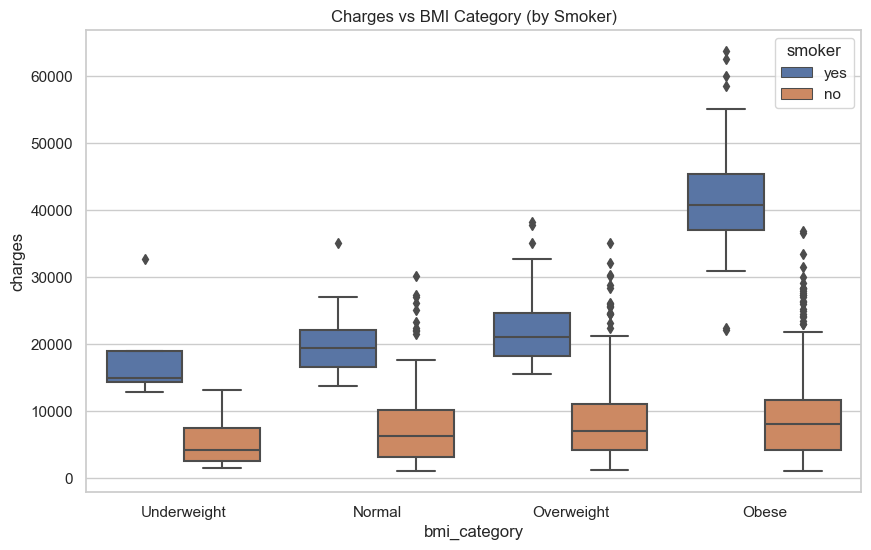

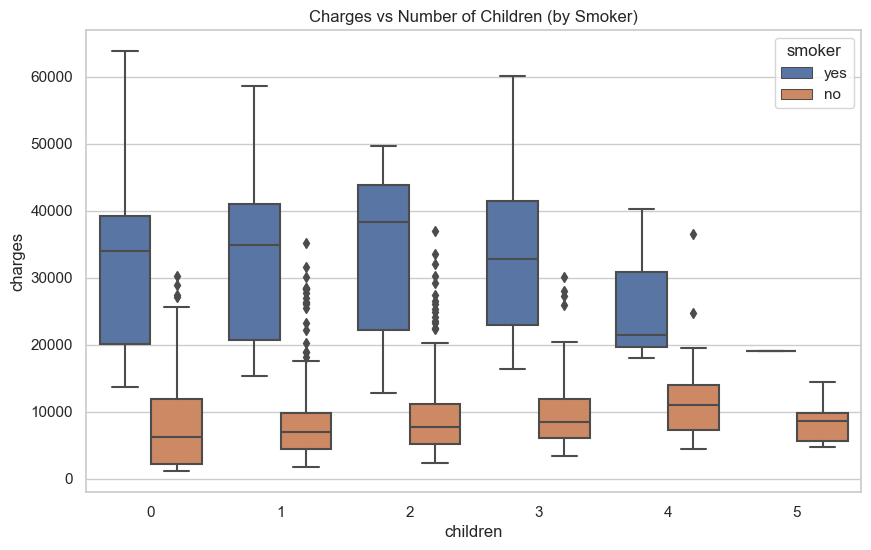

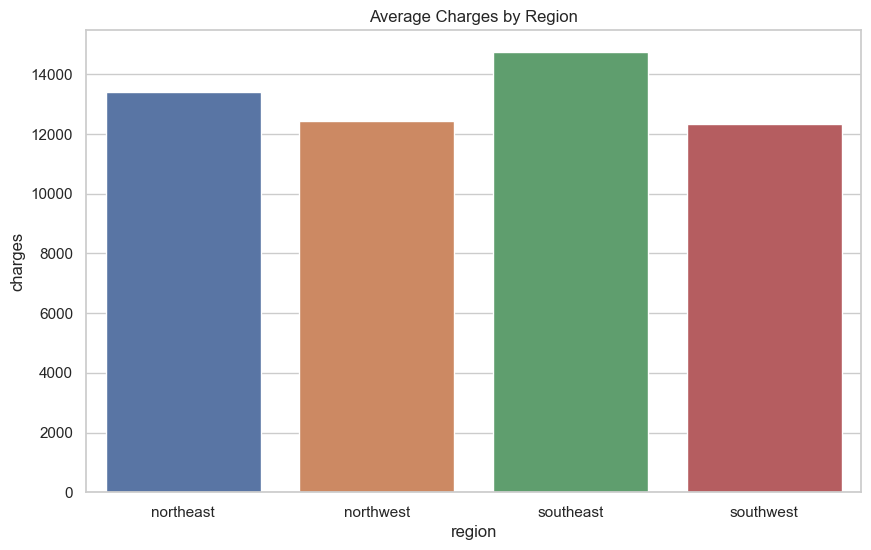

In [73]:
regression_dataset2 = pd.read_csv('./data/medical insurance/insurance.csv')

sb.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

numeric_cols = ['age', 'bmi', 'charges', 'children']
for col in numeric_cols:
    plt.figure()
    sb.histplot(regression_dataset2[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    plt.figure()
    sb.countplot(x=col, data=regression_dataset2)
    plt.title(f'Count of {col}')
    plt.show()

for col in ['sex', 'smoker', 'region', 'children']:
    plt.figure()
    sb.boxplot(x=col, y='charges', data=regression_dataset2)
    plt.title(f'Charges vs {col}')
    plt.show()

plt.figure()
sb.scatterplot(x='age', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs Age (colored by Smoker)')
plt.show()

plt.figure()
sb.scatterplot(x='bmi', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs BMI (colored by Smoker)')
plt.show()

plt.figure()
sb.heatmap(regression_dataset2[['age','bmi','children','charges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sb.pairplot(regression_dataset2[['age','bmi','children','charges','smoker']], hue='smoker')
plt.show()


bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
regression_dataset2['bmi_category'] = pd.cut(regression_dataset2['bmi'], bins=bins, labels=labels)

plt.figure()
sb.boxplot(x='bmi_category', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs BMI Category (by Smoker)')
plt.show()

plt.figure()
sb.boxplot(x='children', y='charges', hue='smoker', data=regression_dataset2)
plt.title('Charges vs Number of Children (by Smoker)')
plt.show()

region_avg = regression_dataset2.groupby('region')['charges'].mean().reset_index()
plt.figure()
sb.barplot(x='region', y='charges', data=region_avg)
plt.title('Average Charges by Region')
plt.show()


In [74]:
regression_dataset['sex'] = regression_dataset['sex'].map({'male': 0,'female': 1})
regression_dataset['smoker'] = regression_dataset['smoker'].map({'no': 0,'yes': 1})
regression_dataset['region'] = regression_dataset['region'].map({'southwest': 0,'northwest': 1,'northeast': 2,'southeast': 3})
print(regression_dataset['region'].unique())
print(regression_dataset.isna().sum())

[0 3 1 2]
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [75]:
print(regression_dataset.head())
print(regression_dataset.dtypes)

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    0  33.770         1       0       3   1725.55230
2   28    0  33.000         3       0       3   4449.46200
3   33    0  22.705         0       0       1  21984.47061
4   32    0  28.880         0       0       1   3866.85520
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


In [76]:
y = regression_dataset['charges']
X = regression_dataset.drop('charges', axis=1)

In [77]:
regression_dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.543348,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130917,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


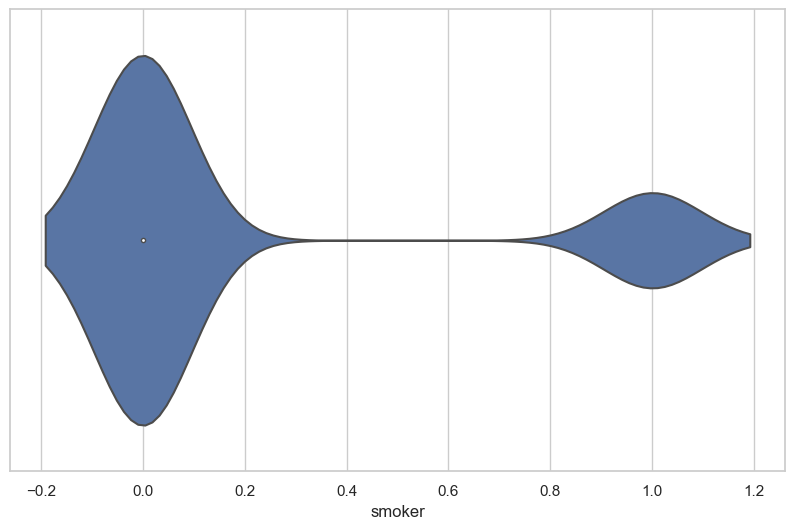

In [78]:
ax1 = sb.violinplot(x='smoker', data=regression_dataset)

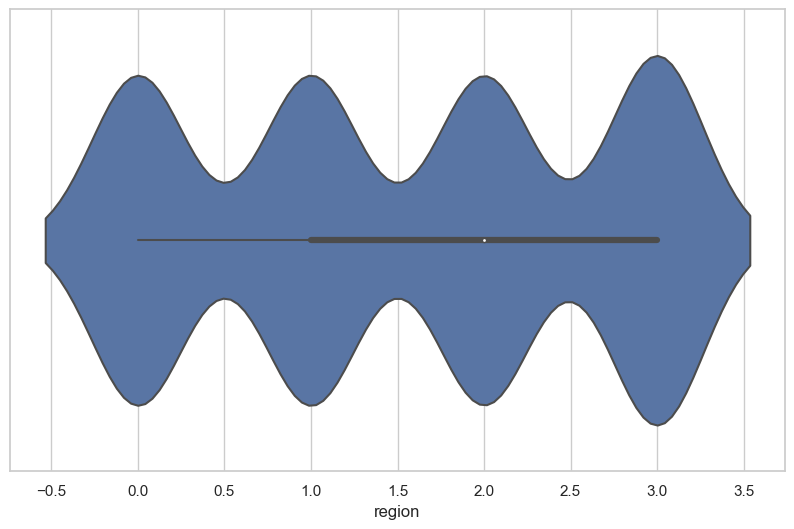

In [79]:
ax1 = sb.violinplot(x='region', data=regression_dataset)

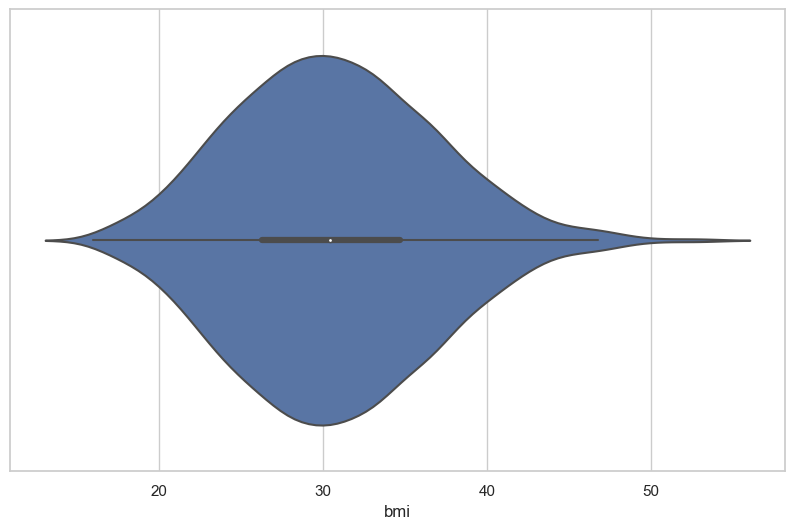

In [80]:
ax1 = sb.violinplot(x='bmi', data=regression_dataset)

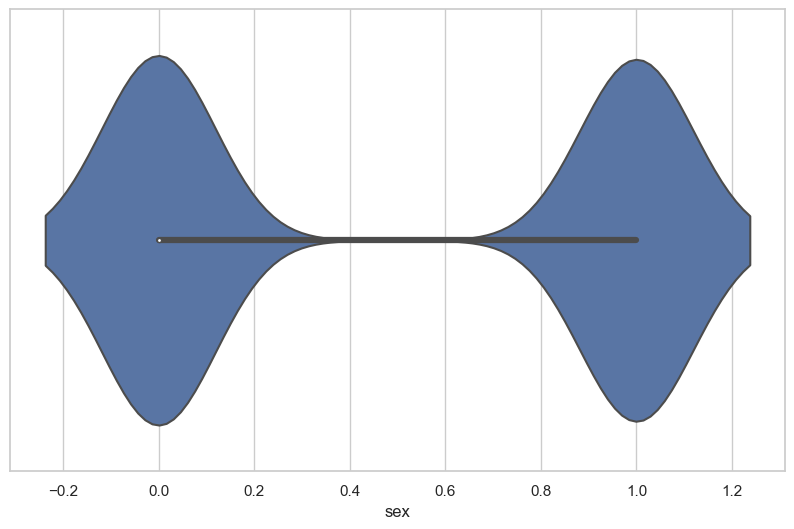

In [81]:
ax1 = sb.violinplot(x='sex', data=regression_dataset)

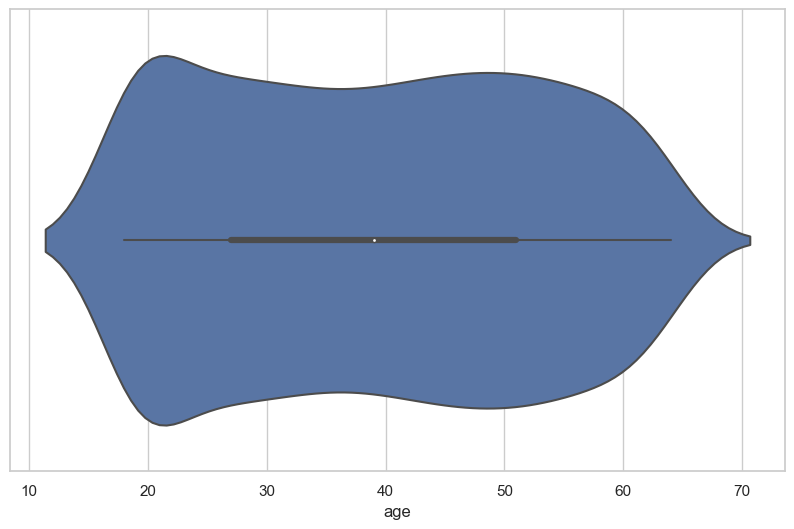

In [82]:
ax1 = sb.violinplot(x='age', data=regression_dataset)

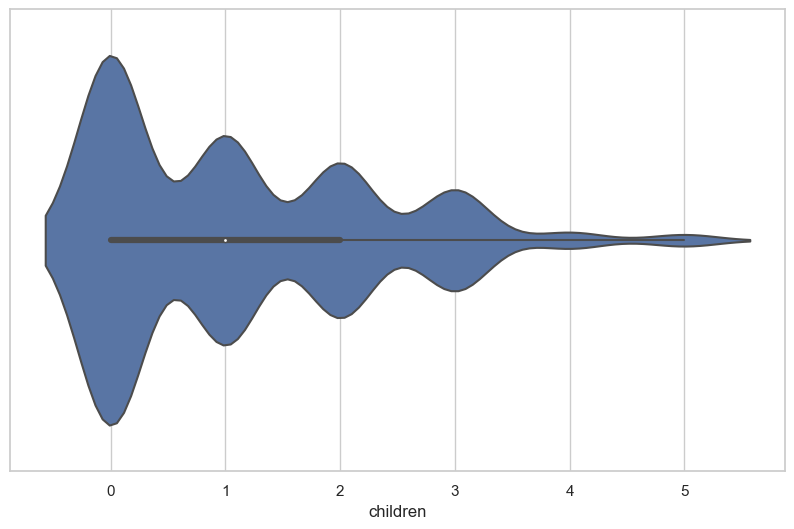

In [83]:
ax2 = sb.violinplot(x='children', data=regression_dataset)

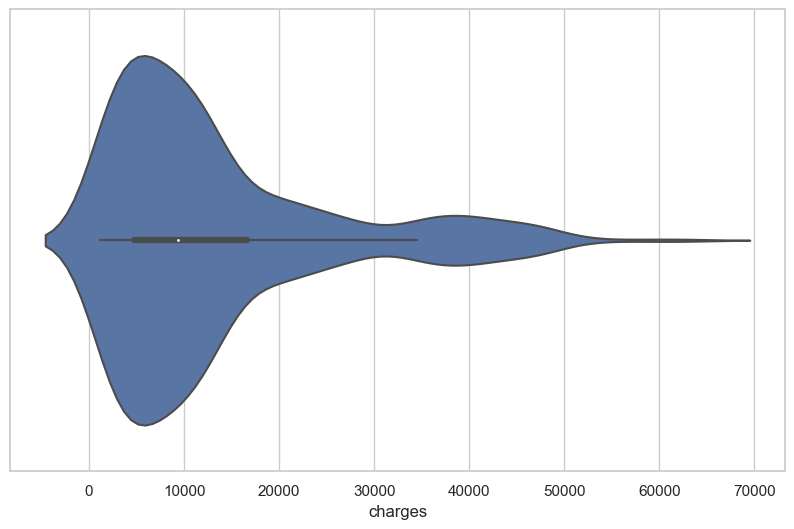

In [84]:
ax3 = sb.violinplot(x='charges', data=regression_dataset)

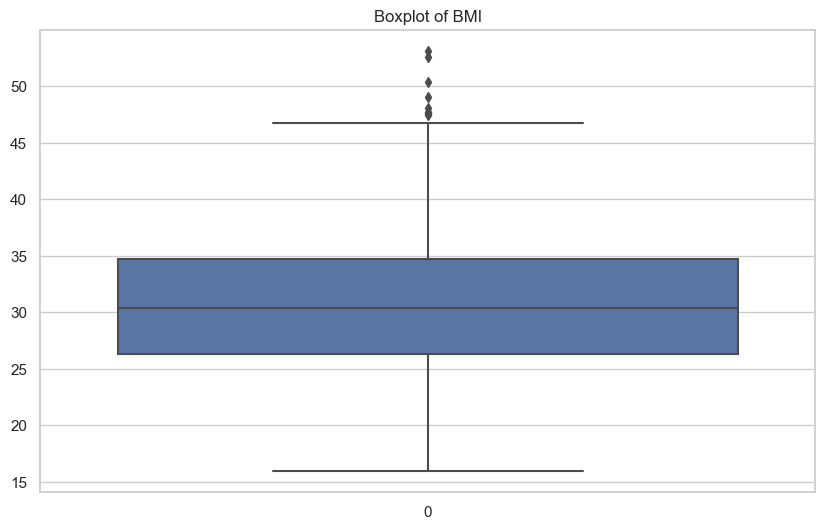

In [85]:
column_name = list(regression_dataset)
df_diabetics = pd.DataFrame(regression_dataset, columns=column_name)

sb.boxplot(df_diabetics['bmi'])
plt.title('Boxplot of BMI')
plt.show()

In [86]:
corr = regression_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.012027,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.014144,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.162590,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.035115,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.069008,0.787251
region,-0.012027,-0.014144,0.162590,-0.035115,0.069008,1.000000,0.077042
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.077042,1.000000


<h2>Feature Engineering</h2>

In [87]:
regression_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [88]:
age_bins = [0, 25, 35, 45, 55, 65, 100]  # 0-25, 26-35, etc.
age_labels = ["0-25", "26-35", "36-45", "46-55", "56-65", "65+"]
X["age_group"] = pd.cut(X["age"], bins=age_bins, labels=age_labels, right=True)

bmi_bins = [0, 18.5, 24.9, 29.9, 100]  # underweight, normal, overweight, obese
bmi_labels = ["underweight", "normal", "overweight", "obese"]
X["bmi_category"] = pd.cut(X["bmi"], bins=bmi_bins, labels=bmi_labels, right=True)


In [89]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [90]:
# Initialize scaler
scaler = StandardScaler()

# Fit scaler on numeric features of X
X_numeric_scaled = scaler.fit_transform(X[numeric_features])

# Convert back to DataFrame if you want
X_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features, index=X.index)

# Replace original numeric columns with scaled values
X[numeric_features] = X_scaled_df

print(X.head())

        age  sex       bmi  children  smoker  region age_group bmi_category
0 -1.438764    1 -0.453320 -0.908614       1       0      0-25   overweight
1 -1.509965    0  0.509621 -0.078767       0       3      0-25        obese
2 -0.797954    0  0.383307  1.580926       0       3     26-35        obese
3 -0.441948    0 -1.305531 -0.908614       0       1     26-35       normal
4 -0.513149    0 -0.292556 -0.908614       0       1     26-35   overweight


<h2>One hot encoding binary and nominal variables.</h2>

In [91]:
df_pandas_encoded = pd.get_dummies(X, columns=['sex', 'region', 'smoker', 'age_group', 'bmi_category'], drop_first=True)
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(X[['sex', 'region', 'smoker', 'age_group', 'bmi_category']])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(['sex', 'region', 'smoker', 'age_group', 'bmi_category']))

X = pd.concat([X.drop(['sex', 'region', 'smoker', 'age_group', 'bmi_category'], axis=1), one_hot_df], axis=1)

X.head()

,age,bmi,children,sex_0,sex_1,region_0,region_1,region_2,region_3,smoker_0,smoker_1,age_group_0-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,bmi_category_normal,bmi_category_obese,bmi_category_overweight,bmi_category_underweight
0,-1.438764,-0.453320,-0.908614,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.509965,0.509621,-0.078767,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.797954,0.383307,1.580926,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.441948,-1.305531,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h3>Testing log charges for skewing</h3>

In [92]:
y_log = np.log1p(y)

<h3>Train test validation split</h3>

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.30, 
                                   shuffle=True,
                                   random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                   test_size=0.50, 
                                   shuffle=True,
                                   random_state=42)

<h3>Should we scale and/or normalize the data?</h3>
Not really. It may distort feature importances and make interpretability harder. Decision trees and ensemble methods built from them split data based on feature thresholds. However for the sake of xgboost we will do this

<h2>Model training - Decision Tree Regressor, XGBoost Regression, Ensemble Random Forest Regressor</h2>

In [94]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

<h2>Random Forest Model</h2>

In [95]:
tree_regressor = RandomForestRegressor(max_depth=4, random_state=42, bootstrap=True, oob_score=True, n_jobs=8)
tree_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_jobs=8, oob_score=True, random_state=42)

In [96]:
from sklearn.model_selection import cross_val_score

y_pred = tree_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")
print(f"R2 Error: {r2:.4f}")


Mean Squared Error: 21267604.6815
Mean Absolute Error: 2695.7837
Mean Absolute Percentage Error: 0.2970
R2 Error: 0.8598


In [30]:
import optuna
from functools import lru_cache
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import LeaveOneOut, KFold

In [33]:
def objective(trial):
    params ={
        'max_depth': trial.suggest_int("max_depth", 3, 32, log=True),
        'min_samples_split': trial.suggest_int("min_samples_split", 5, 10),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.01, 0.5),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.01, 0.50),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.01, 0.99),
    }

    clf=RandomForestRegressor(**params, random_state=42, bootstrap=True, oob_score=True, n_jobs=8)
    clf.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

    #pred = clf.predict(X_val)
    #mse = mean_squared_error(y_val, pred)
    return -scores.mean()

In [34]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

[I 2025-12-02 19:06:27,768] A new study created in memory with name: no-name-7e6e081c-3010-4617-ad87-f279ab4dcd5e


[I 2025-12-02 19:06:29,324] Trial 0 finished with value: 9119.007531882971 and parameters: {'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 0.46206756105766145, 'min_weight_fraction_leaf': 0.07925127896057199, 'ccp_alpha': 0.43509238232296576}. Best is trial 0 with value: 9119.007531882971.
[I 2025-12-02 19:06:31,044] Trial 1 finished with value: 9119.007531882971 and parameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 0.4826380957773784, 'min_weight_fraction_leaf': 0.25245613578496495, 'ccp_alpha': 0.7887544576330656}. Best is trial 0 with value: 9119.007531882971.
[I 2025-12-02 19:06:32,364] Trial 2 finished with value: 9122.582685531539 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 0.16905440017986698, 'min_weight_fraction_leaf': 0.4988318652096441, 'ccp_alpha': 0.6225677031157887}. Best is trial 0 with value: 9119.007531882971.
[I 2025-12-02 19:06:33,720] Trial 3 finished with value: 9119.007531882971 and parameters: {

In [38]:
print("Best random forest hyperparameters:", study.best_params)
print("Best random forest score:", study.best_value)

Best random forest hyperparameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 0.03202478636658039, 'min_weight_fraction_leaf': 0.04388953865182085, 'ccp_alpha': 0.5655484841483671}
Best random forest score: 2802.4173841791635


In [29]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

<h3>Random Forest Results Validation</h3>

In [35]:
best_random_model = RandomForestRegressor(**study.best_params, random_state=42)
best_random_model.fit(X_train, y_train)

val_pred = best_random_model.predict(X_val)
val_mae = mean_absolute_error(y_val, val_pred)
print(val_mae)

2479.617103834693


In [ ]:
def RFtest(best_model):
    test_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)

    print("Test MSE:", test_mse)
    print("Test MAE:", test_mae)
    print("Test R2:", test_r2)
    print("Test MAPE:", test_mape)

    return [test_mse, test_mae, test_mape, test_r2]

RFtest(best_model=best_random_model)

Test MSE: 20346101.817307536
Test MAE: 2590.152547644691
Test R2: 0.8658344066581881
Test MAPE: 0.2661717588028658


[20346101.817307536, 2590.152547644691, 0.2661717588028658, 0.8658344066581881]

In [31]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in best_random_model.estimators_], axis=0)


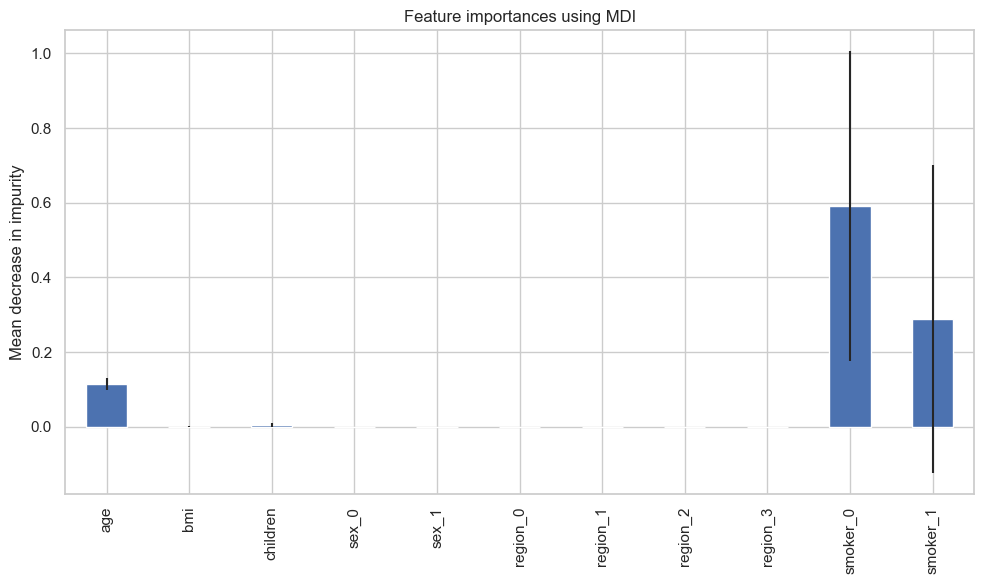

In [32]:
import pandas as pd
forest_importances = pd.Series(best_random_model.feature_importances_, index=list(X))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<h2>Training Random Forest on the best parameters</h2>

In [33]:
best_random_model = RandomForestRegressor(**study.best_params, random_state=42)

best_random_model.fit(X_train, y_train)

test_pred = best_random_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
print("Test MSE:", test_mse)

Test MSE: 43369155.581995144


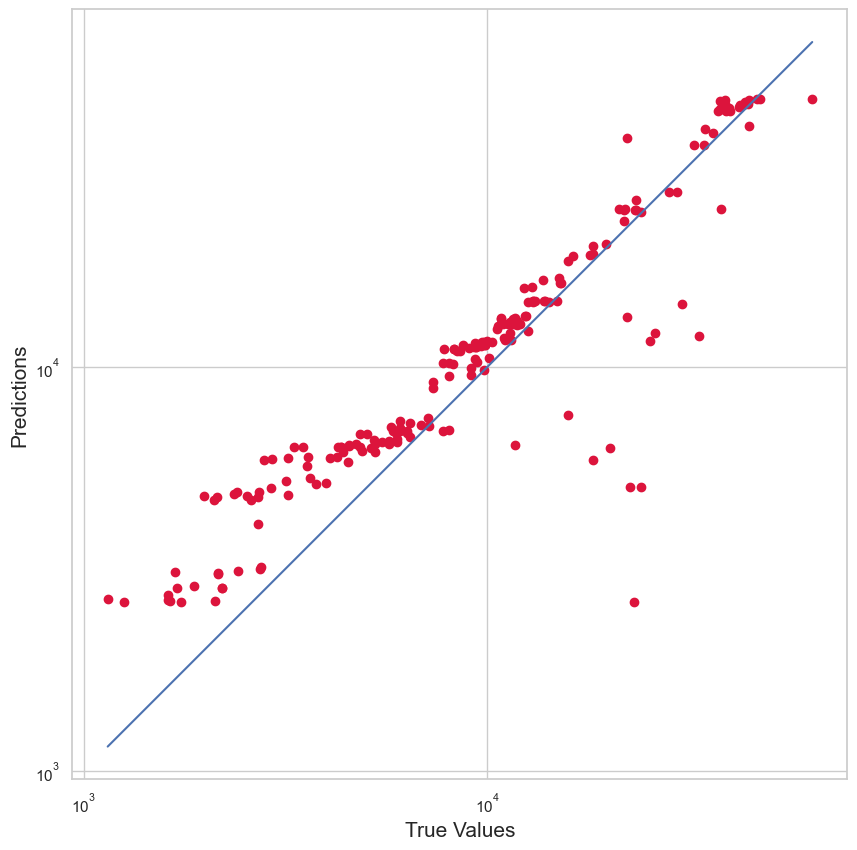

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<h2>Ensemble Decision Tree Bagging</h2>

In [35]:
from sklearn.ensemble import BaggingRegressor, _bagging
print(_bagging.MAX_INT)

2147483647


In [36]:
from sklearn.svm import SVR

def bagging_objective(trial):
    params ={
        'max_samples': trial.suggest_int("max_samples", 5, 10),
        'max_features': trial.suggest_int('max_features', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 3, 10),
    }

    clf=BaggingRegressor(**params, random_state=42, oob_score = True)
    clf.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

    #pred = clf.predict(X_val)
    #mse = mean_squared_error(y_val, pred)
    return -scores.mean()

In [37]:
study = optuna.create_study(direction="minimize")
study.optimize(bagging_objective, n_trials=100)

[I 2025-11-21 14:33:26,525] A new study created in memory with name: no-name-4339231c-7a23-400d-bb8a-a46c61d16718
[I 2025-11-21 14:33:26,616] Trial 0 finished with value: 7639.876523575076 and parameters: {'max_samples': 10, 'max_features': 4, 'n_estimators': 5}. Best is trial 0 with value: 7639.876523575076.
[I 2025-11-21 14:33:26,705] Trial 1 finished with value: 6428.14979058303 and parameters: {'max_samples': 6, 'max_features': 10, 'n_estimators': 6}. Best is trial 1 with value: 6428.14979058303.
[I 2025-11-21 14:33:26,792] Trial 2 finished with value: 7454.503131718602 and parameters: {'max_samples': 10, 'max_features': 4, 'n_estimators': 4}. Best is trial 1 with value: 6428.14979058303.
[I 2025-11-21 14:33:26,947] Trial 3 finished with value: 5713.104843204701 and parameters: {'max_samples': 7, 'max_features': 8, 'n_estimators': 9}. Best is trial 3 with value: 5713.104843204701.
[I 2025-11-21 14:33:27,036] Trial 4 finished with value: 6497.987432175978 and parameters: {'max_sampl

In [38]:
best_model = BaggingRegressor(**study.best_params, random_state=42)

best_model.fit(X_train, y_train)

def DTtest(best_model):
    test_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)

    print("Test MSE:", test_mse)
    print("Test MAE:", test_mae)
    print("Test R2:", test_r2)
    print("Test MAPE:", test_mape)

    return [test_mse, test_mae, test_mape, test_r2]

DTtest(best_model=best_model)

Test MSE: 67946603.25096977
Test MAE: 6148.298106097292
Test R2: 0.5519487505477643
Test MAPE: 0.8641410782697543


[67946603.25096977, 6148.298106097292, 0.8641410782697543, 0.5519487505477643]

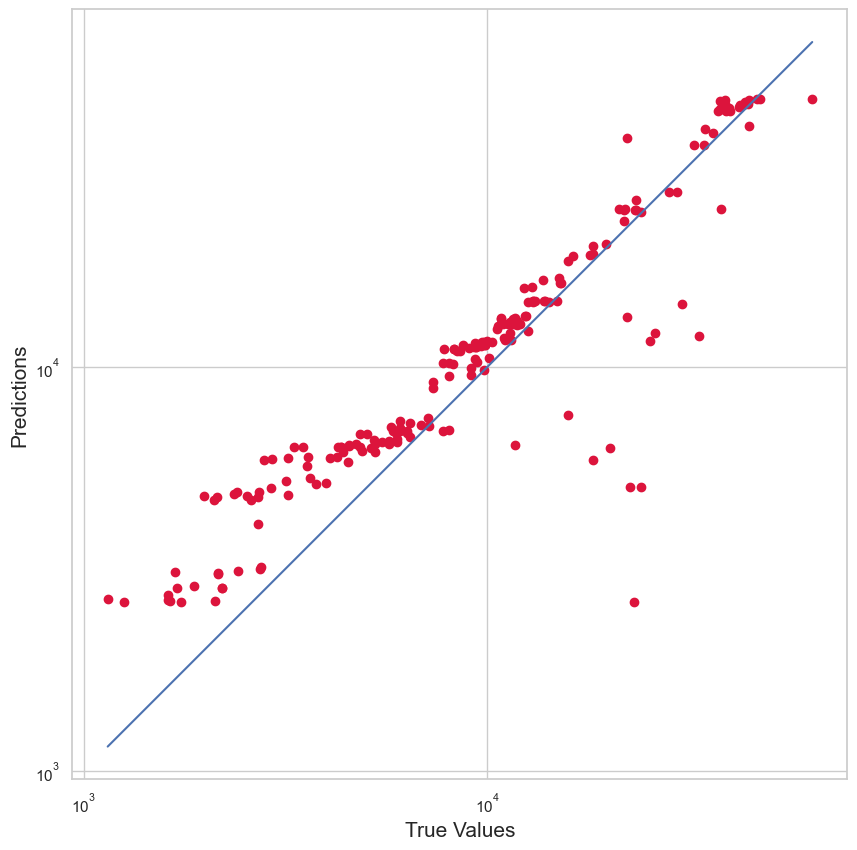

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [40]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

<h2>XGBoost Regressor</h2>

In [97]:
import xgboost

In [98]:
xgb_model = xgboost.XGBRegressor(n_estimators=10, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None, ...)

In [99]:
test_pred = xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)
print("Test R2:", test_r2)

Test MSE: 33632343.35265756
Test MAE: 4304.901121781716
Test MAPE: 0.6760003002235315
Test R2: 0.7782227110676097


In [100]:
def xgb_objective(trial):
    params ={
        'n_estimators': trial.suggest_int("n_estimators", 100, 500, log=True),
        'max_depth': trial.suggest_int("max_depth", 2, 10),
        'eta': trial.suggest_float("eta", 0.1, 0.99),
        'subsample':  trial.suggest_float('subsample', 0.2, 0.99),
        'colsample_bytree':  trial.suggest_float('colsample_bytree', 0.1, 0.99),
        'gamma': trial.suggest_float('gamma', 0.1, 0.99),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 0.99),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 0.99),
        #'booster': trial.suggest_categorical('booster', ['dart', 'linear'])

    }
    clf = xgboost.XGBRegressor(**params, random_state=42, n_jobs=8)
    clf.fit(X_train, y_train)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

    #pred = clf.predict(X_val)
    #mse = mean_squared_error(y_val, pred)
    return -scores.mean()

In [101]:
study = optuna.create_study(direction="minimize")
study.optimize(xgb_objective, n_trials=100)

[I 2025-12-02 19:24:29,937] A new study created in memory with name: no-name-beb66736-9d45-432f-8426-827afbd651f9
[I 2025-12-02 19:24:32,663] Trial 0 finished with value: 4919.760776195925 and parameters: {'n_estimators': 472, 'max_depth': 8, 'eta': 0.7530152615862925, 'subsample': 0.531647646106123, 'colsample_bytree': 0.586222915670615, 'gamma': 0.645760283774527, 'reg_alpha': 0.40377231355563037, 'reg_lambda': 0.5033636160434716}. Best is trial 0 with value: 4919.760776195925.
[I 2025-12-02 19:24:34,226] Trial 1 finished with value: 7222.001240636775 and parameters: {'n_estimators': 151, 'max_depth': 9, 'eta': 0.5286812776479932, 'subsample': 0.5088673583461079, 'colsample_bytree': 0.27037224770080637, 'gamma': 0.6774275495133806, 'reg_alpha': 0.1847089080140708, 'reg_lambda': 0.8852151460042196}. Best is trial 0 with value: 4919.760776195925.
[I 2025-12-02 19:24:35,866] Trial 2 finished with value: 4430.919486621389 and parameters: {'n_estimators': 260, 'max_depth': 5, 'eta': 0.905

In [46]:
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

In [102]:
best_xgb_model = xgboost.XGBRegressor(**study.best_params, random_state=42)

In [103]:
import joblib

joblib.dump(best_xgb_model, "xgb1.joblib.dat")


['xgb1.joblib.dat']

In [104]:
loaded_model = joblib.load("xgb1.joblib.dat")

best_xgb_model.fit(X_train, y_train)
test_pred = best_xgb_model.predict(X_test)

def XGBtest(best_model):
    test_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)

    print("Test MSE:", test_mse)
    print("Test MAE:", test_mae)
    print("Test R2:", test_r2)
    print("Test MAPE:", test_mape)

    return [test_mse, test_mae, test_mape, test_r2]

XGBtest(best_model=best_xgb_model)

Test MSE: 19239480.677493557
Test MAE: 2403.0037534612097
Test R2: 0.873131651268526
Test MAPE: 0.25166009211716167


[19239480.677493557,
 2403.0037534612097,
 0.25166009211716167,
 0.873131651268526]

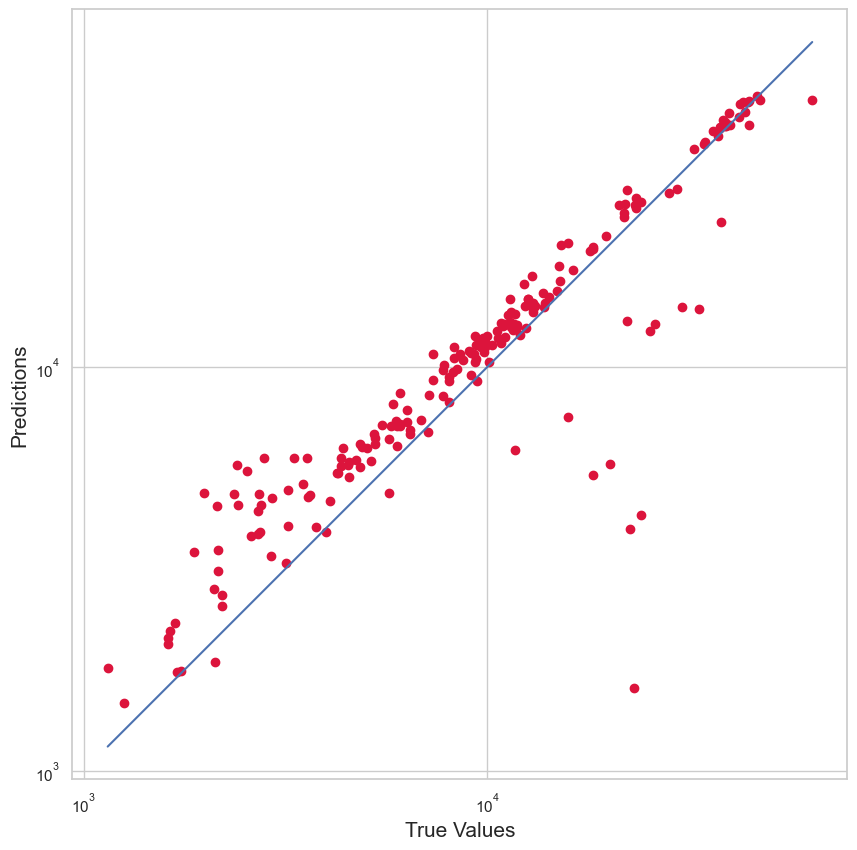

In [105]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, test_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(test_pred), max(y_test))
p2 = min(min(test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

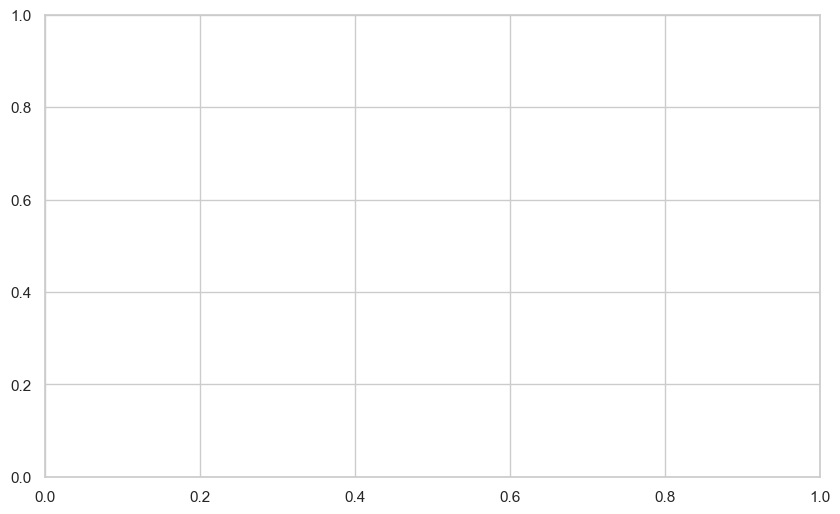

In [ ]:
import graphviz

tree_index = 0
xgboost.plot_tree(best_xgb_model, num_trees=tree_index)
plt.show()

<h2>Models exporting</h2>

In [63]:
best_xgb_model.feature_importances_

array([0.0472171 , 0.06286296, 0.01286356, 0.00538375, 0.00313562,
       0.00686273, 0.00571199, 0.00976175, 0.00546442, 0.39121512,
       0.44952103], dtype=float32)

In [69]:
X_train.dtypes

age           int64
bmi         float64
children      int64
sex_0       float64
sex_1       float64
region_0    float64
region_1    float64
region_2    float64
region_3    float64
smoker_0    float64
smoker_1    float64
dtype: object

In [ ]:
import pickle

#export of random forest
with open("./models/rf_regressor.pkl", "wb") as f:
    pickle.dump(best_random_model, f)

#export og ensemble decision tree
with open("./models/dt_regressor.pkl", "wb") as f:
    pickle.dump(best_model, f)

#export of xgboost regressor
with open("./models/xgb_regressor.pkl", "wb") as f:
    pickle.dump(best_xgb_model, f)

<h2>Pipelining</h2>

In [ ]:
xgb_pipeline = Pipeline([
    ('XGBRegressor', xgboost.XGBRegressor(**study.best_params, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)

In [ ]:
Bagging_pipeline = Pipeline([
    ('EDTree', BaggingRegressor(**study.best_params, random_state=42))
])

Bagging_pipeline.fit(X_train, y_train)
y_pred = Bagging_pipeline.predict(X_test)

In [ ]:
best_RF_pipeline = Pipeline([
    ('model', RandomForestRegressor(
        random_state=42,
        bootstrap=True,
        oob_score=True,
        n_jobs=8,
        **{k.replace("model__", ""): v for k, v in study.best_params.items()}
    ))
])

best_RF_pipeline.fit(X_train, y_train)
y_pred = best_RF_pipeline.predict(X_test)


NameError: name 'study' is not defined

In [ ]:
set_config(display="diagram")
RF_pipeline

NameError: name 'RF_pipeline' is not defined

In [ ]:
Bagging_pipeline

In [ ]:
xgb_pipeline